In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append("../")

from carbonify import BaseCarbone

# Exploring Base Carbone
- [Base Carbone](https://data.ademe.fr/datasets/base-carbone(r)) by ADEME 
- [Documentation](https://www.bilans-ges.ademe.fr/fr/accueil/contenu/index/page/presentation/siGras/0)

##### Notes
- Analyser les tags
- Analyser les catégories
- Vérifier ce que c'est que les "qualités"
- Où sont les émissions ?
- Regarder la méthode carbon facts

## Loading data

In [12]:
PATH = "../data/raw/base_carbone.csv"

baca = BaseCarbone(PATH)

## Exploring categories

In [13]:
baca.categories

,category1,category2,category3,category4,category5
0,Achats de biens,"Produits agro-alimentaires, plats préparés et ...",Entrées et plats composés,Salades composées et crudités,NaN
1,Achats de biens,"Produits agro-alimentaires, plats préparés et ...",Produits céréaliers,Pains et viennoiseries,NaN
2,Achats de biens,"Produits agro-alimentaires, plats préparés et ...",Produits céréaliers,Céréales de petit-déjeuner et biscuits,NaN
3,Achats de biens,"Produits agro-alimentaires, plats préparés et ...",Produits céréaliers,Céréales de petit-déjeuner et biscuits,NaN
4,Achats de biens,"Produits agro-alimentaires, plats préparés et ...",Produits céréaliers,Céréales de petit-déjeuner et biscuits,NaN
...,...,...,...,...,...
9198,Achats de biens,Machines et équipements,Electroménager,NaN,NaN
9199,Achats de biens,Machines et équipements,Electroménager,NaN,NaN
9200,Achats de biens,Machines et équipements,Electroménager,NaN,NaN
9201,Achats de biens,Métaux et produits métalliques,Autres métaux,NaN,NaN


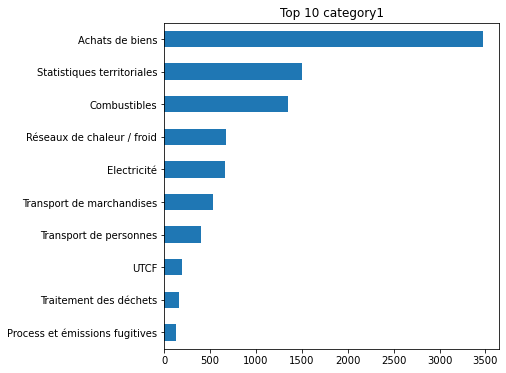

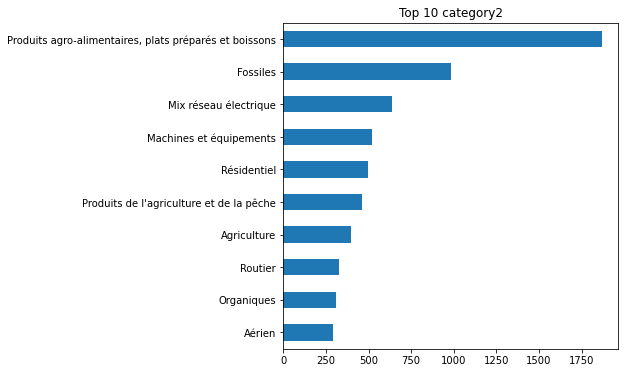

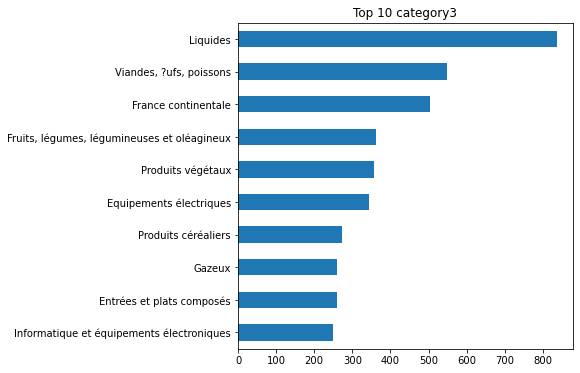

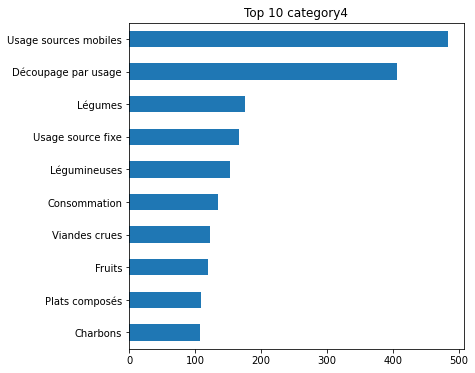

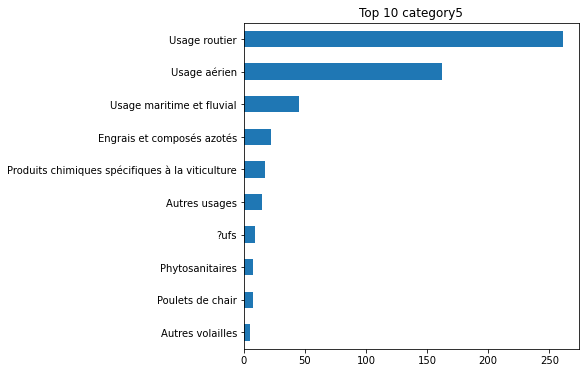

In [136]:
topn = 10
for col in baca.categories.columns:
    categories[col].value_counts().sort_values(ascending = True).tail(topn).plot(kind = "barh",figsize = (6,6),title = f"Top {topn} {col}")
    plt.show()

> TODO - Mondrian ou plotly hierarchical plot de la séquence de catégorie

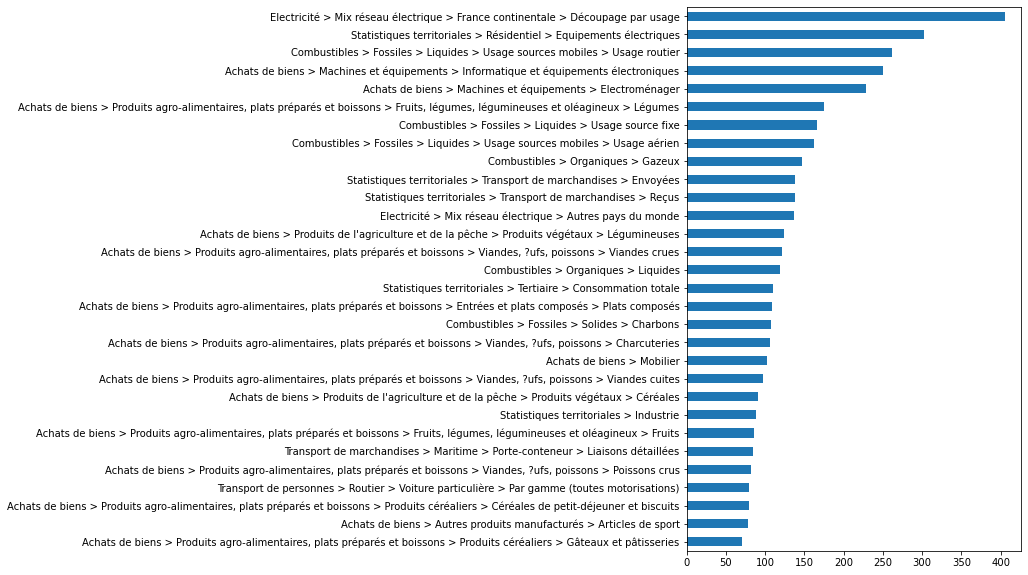

In [138]:
baca.data["category"].value_counts().sort_values(ascending = True).tail(30).plot(kind = "barh",figsize = (6,10))
plt.show()

In [66]:
import plotly.express as px

In [139]:
categories_count = (
    baca.categories
    .fillna("No category")
    .assign(count = lambda x : 1)
    .groupby(categories.columns.tolist())
    ["count"].sum()
    .reset_index()
    .sort_values("count",ascending = False)
)

In [140]:
fig = px.icicle(categories_count, path=['category1', 'category2',"category3"], values='count',
                  color='category1')
fig.show()

## Exploring tags

<AxesSubplot:>

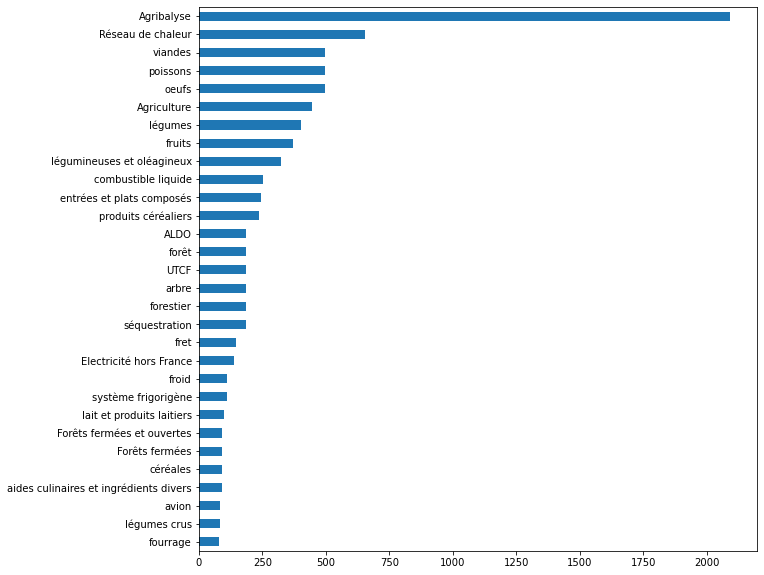

In [141]:
(
    baca.data["tags"]
    .str.split(",")
    .dropna()
    .explode()
    .value_counts()
    .sort_values(ascending = True).tail(30)
    .plot(kind = "barh",figsize = (10,10))
)

Tags don't seem useful at first

## Exploring units

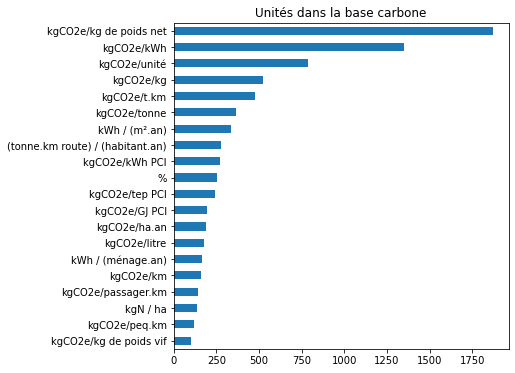

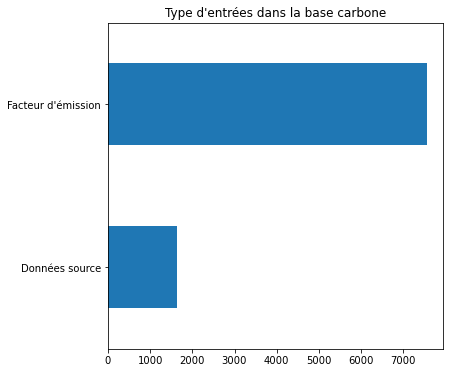

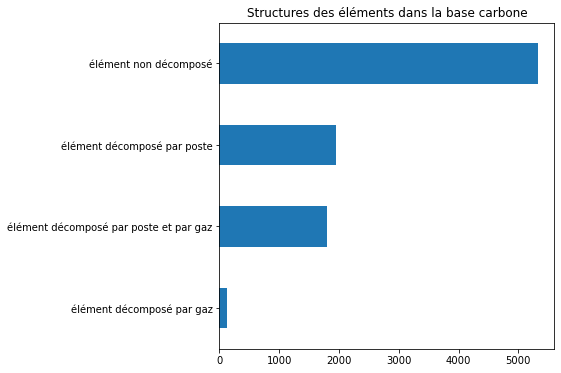

In [143]:
baca.data["unit"].value_counts().sort_values(ascending = True).tail(20).plot(kind = "barh",figsize = (6,6),title = "Unités dans la base carbone")
plt.show()

baca.data["element_type"].value_counts().sort_values(ascending = True).tail(20).plot(kind = "barh",figsize = (6,6),title = "Type d'entrées dans la base carbone")
plt.show()

baca.data["structure"].value_counts().sort_values(ascending = True).tail(20).plot(kind = "barh",figsize = (6,6),title = "Structures des éléments dans la base carbone")
plt.show()


## Exploring a few examples

### Comparison of a trip by plane or train

In [4]:
train = baca.search("train")
avion = baca.search("avion")

In [18]:
r,fig = baca.search("mangue",kind = "treemap",color_by_emissions = True,height = 800)
fig

In [162]:
y = x[baca._category_cols].isnull().sum() == len(x)

In [163]:
y[y]

category5    True
dtype: bool

In [147]:
avion.shape

(297, 58)

In [148]:
avion

,row_type,element_id,structure,element_type,element_status,name_base,name_attribute,Nom frontière français,category,tags,unit,Contributeur,Autres Contributeurs,Programme,Url du programme,Source,geography,Sous-localisation géographique français,Date de création,Date de modification,Période de validité,Incertitude,Réglementations,Transparence,Qualité,Qualité TeR,Qualité GR,Qualité TiR,Qualité C,Qualité P,Qualité M,Commentaire français,Type poste,Nom poste français,emissions,CO2f,CH4f,CH4b,N2O,Code gaz supplémentaire 1,Valeur gaz supplémentaire 1,Code gaz supplémentaire 2,Valeur gaz supplémentaire 2,Code gaz supplémentaire 3,Valeur gaz supplémentaire 3,Code gaz supplémentaire 4,Valeur gaz supplémentaire 4,Code gaz supplémentaire 5,Valeur gaz supplémentaire 5,Autres GES,CO2b,text,text_split,category1,category2,category3,category4,category5
264,Elément,28057,élément décomposé par poste et par gaz,Facteur d'émission,Valide générique,Avion cargo,"10 à 25 tonnes, 500 - 1000 kms, 2018",AVEC trainées,Transport de marchandises > Aérien > Avion Car...,"trainées,avion,fret",kgCO2e/t.km,GT Transport Base Carbone,NaN,NaN,NaN,Ecocalculateur DGAC,France continentale,NaN,28/04/2020,28/04/2020,31-mars-21,70.0,DonnÃ©es de l'article L229-25 de la loi TECV,4,NaN,5.0,2.0,4.0,5.0,2.0,2.0,Données intégrant l'impact induit des trainées...,NaN,NaN,"3,47","1,86","0,0173",0,"0,0263",Divers,"1,57",NaN,0,NaN,0.0,NaN,0.0,NaN,0,0,0,"avion cargo 10 à 25 tonnes, 500 - 1000 kms, 20...","[avion, cargo, tonnes, 500, 1000, kms, 2018, t...",Transport de marchandises,Aérien,Avion Cargo,10 - 25 t : détail par kms parcourus,NaN
265,Poste,28057,élément décomposé par poste et par gaz,Facteur d'émission,Valide générique,Avion cargo,"10 à 25 tonnes, 500 - 1000 kms, 2018",AVEC trainées,Transport de marchandises > Aérien > Avion Car...,NaN,kgCO2e/t.km,GT Transport Base Carbone,NaN,NaN,NaN,Ecocalculateur DGAC,France continentale,NaN,28/04/2020,28/04/2020,31-mars-21,70.0,DonnÃ©es de l'article L229-25 de la loi TECV,4,NaN,5.0,2.0,4.0,5.0,2.0,2.0,Données intégrant l'impact induit des trainées...,Amont,Carburant,"0,31","0,296","2,50E-03",0,"0,0115",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"avion cargo 10 à 25 tonnes, 500 - 1000 kms, 20...","[avion, cargo, tonnes, 500, 1000, kms, 2018, t...",Transport de marchandises,Aérien,Avion Cargo,10 - 25 t : détail par kms parcourus,NaN
266,Poste,28057,élément décomposé par poste et par gaz,Facteur d'émission,Valide générique,Avion cargo,"10 à 25 tonnes, 500 - 1000 kms, 2018",AVEC trainées,Transport de marchandises > Aérien > Avion Car...,NaN,kgCO2e/t.km,GT Transport Base Carbone,NaN,NaN,NaN,Ecocalculateur DGAC,France continentale,NaN,28/04/2020,28/04/2020,31-mars-21,70.0,DonnÃ©es de l'article L229-25 de la loi TECV,4,NaN,5.0,2.0,4.0,5.0,2.0,2.0,Données intégrant l'impact induit des trainées...,Combustion,Carburant,"1,59","1,56","0,0148",0,"0,0148",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"avion cargo 10 à 25 tonnes, 500 - 1000 kms, 20...","[avion, cargo, tonnes, 500, 1000, kms, 2018, t...",Transport de marchandises,Aérien,Avion Cargo,10 - 25 t : détail par kms parcourus,NaN
267,Poste,28057,élément décomposé par poste et par gaz,Facteur d'émission,Valide générique,Avion cargo,"10 à 25 tonnes, 500 - 1000 kms, 2018",AVEC trainées,Transport de marchandises > Aérien > Avion Car...,NaN,kgCO2e/t.km,GT Transport Base Carbone,NaN,NaN,NaN,Ecocalculateur DGAC,France continentale,NaN,28/04/2020,28/04/2020,31-mars-21,70.0,DonnÃ©es de l'article L229-25 de la loi TECV,4,NaN,5.0,2.0,4.0,5.0,2.0,2.0,Données intégrant l'impact induit des trainées...,Emissions fugitives,Trainées de condensation,"1,57",0,0,0,0,NaN,"1,57",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"avion cargo 10 à 25 tonnes, 500 - 1000 kms, 20...","[avion, cargo, tonnes, 500, 1000, kms, 2018, t...",Transport de marchandises,Aérien,Avion Cargo,10 - 25 t : détail par kms parcourus,NaN
268,Elément,28058,élément décomposé par poste et par gaz,Facteur d'émission,Valide générique,Avion cargo,"10 à 25 ton